### Regression, Observations, and Interventions

This chapter builds a link between associations, interventions, and regression models. 

<b>Linear regression</b> is a basic data-fitting algorithm that can be used to predict the expected value of a dependent (target) variable, Y, given values of some predictor(s), X. Formally, this is:
- Yhat<sub>X = x</sub> = E[Y | X = x].

An important feature of linear regression is that it allows us to easily quantify the strength of the relationship between predictors and the target variable by computing regression coefficients. Regression coefficients can be thought of as the amount of change in the <i>predicted</i> output variable relative to a unit change in the input variable. 

As an example, a model with one predictor, x. First, we define the data-generating process. We'll make this process follow the linear regression formula (Yhat<sub>i</sub> = a + bx<sub>i</sub>) and assign arbitrary values to the (true) parameters a* and b*. We will also add noise to the model and mark it as e (this will be normally distributed with zero mean and a standard deviation of 1). Additionally we will scale e by 0.5. So the data-generating formula becomes: 
- yhat<sub>i</sub> = 1.12 + 0.93x<sub>i</sub> + 0.5e<sub>i</sub>

In [ ]:
%pip install statsmodels matplotlib

In [1]:
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# Set seed for reproducibility + # samples to generate
np.random.seed(42)
N_SAMPLES = 5_000

# Define model parameters
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

# Use model formula to generate the data
X = np.random.randn(N_SAMPLES)
y = alpha + (beta * X) + (0.5 * epsilon)

# Statsmodels requires us to add a constant feature to perform the intercept computations
X = sm.add_constant(X)

# 5 rows of x
print(X[:5, :])

[[ 1.         -0.42375968]
 [ 1.         -0.45341411]
 [ 1.         -1.79564317]
 [ 1.         -0.33009019]
 [ 1.          0.73282908]]


In [3]:
# Fit regression model
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        21:52:21   Log-Likelihood:                -3610.8
No. Observations:                5000   AIC:                             7226.
Df Residuals:                    4998   BIC:                             7239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1228      0.007    159.324      0.0

The coefficient marked <i>const</i> is a, the estimate of the true a* parameter, while x1 is b, the estimate of b*. They are slightly different from their true counterparts because we made our model noisy by adding the e term. Both coefficents are associated with p-values below 0.001, which indicates they are <b>statistically significant</b> at the customary p < 0.05 level.

<b>P-values and statistical significance</b>: Broadly speaking, the p-value is a statistical device meant to help distinguish between the signal and the noise in statistical comparison/summaries. The p-value is the probability of observing data at least as extreme as we observed, given that the null hypothesis is true. 

The <b>null hypothesis</b> usually states that there is <i>no effect or no difference</i> between two or more objects that we compare. For linear regression, we test two types of null hypotheses:
- Null hypotheses for coefficients (including the intercept). The null hypothesis for a given coefficient states that this coefficient is not significantly different from zero. 
- A null hypothesis for the entire model. For this it states that the entire model is not significantly different from the null model (for simple regression, this is an intercept-only model).

The lower the p-value, the <i>less likely</i> the null hypothesis is, i.e. the more likely we are to agree that it should be rejected. 

In [4]:
# Generate predictions
y_pred = fitted_model.predict(X)

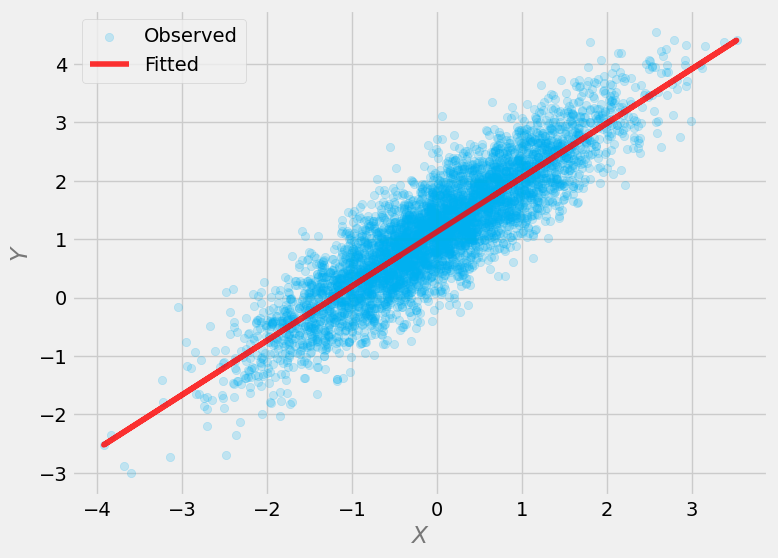

In [7]:
# Plot
COLORS = [
    '#00B0F0',
    '#FF0000'
]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(X[:, 1], y_pred, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
#[l.set_alpha(.8) for l in legend.legendHandles]

plt.show()

Each blue dot above represents a single observation, while the red line represents the best-fit model found by the linear regression algorithm. 

Regression is a purely statistical <i>rung 1</i> model and we can use it to quantify the association between X and Y (and Y and X). Regression does not say anything about the data's causal structure. There might be not causal link between two variables at all, but we can still find a relationship between them using a regression model.

Let's show this by regressing X on Y. 

In [8]:
# Let's remove the constant (now X becomes our target variable) 
x_rev = X[:, 1]

# Let's add constant (now Y becomes our predictor)
Y_rev = sm.add_constant(y)

# Instantiate the model and fit it
model_rev = sm.OLS(x_rev, Y_rev)
fitted_model_rev = model_rev.fit()

# Print results summary
print(fitted_model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        22:07:25   Log-Likelihood:                -3358.1
No. Observations:                5000   AIC:                             6720.
Df Residuals:                    4998   BIC:                             6733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9451      0.010    -97.388      0.0

The coefficients have changed. The intercept is now negative (since now it's the point where the line crosses the X axis). Plotting this further illustrates the point:

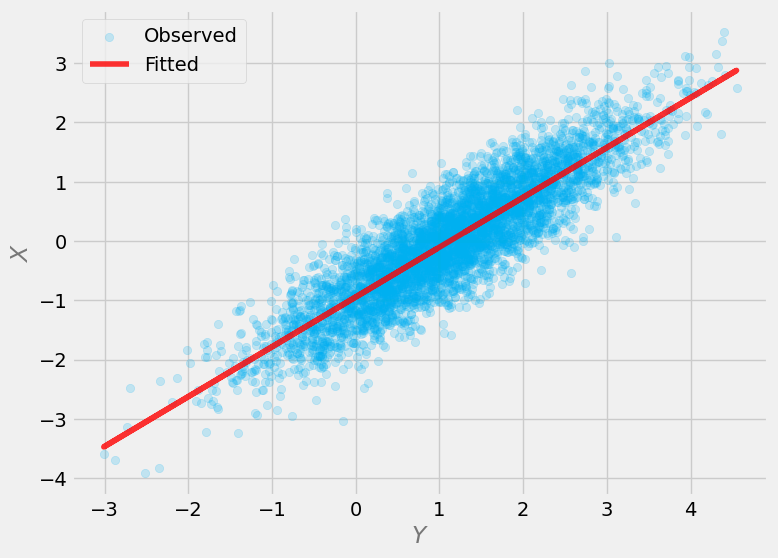

In [9]:
# Generate predictions
x_pred_rev = fitted_model_rev.predict(Y_rev)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_rev[:, 1], x_rev, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(Y_rev[:, 1], x_pred_rev, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$Y$', alpha=.5)
plt.ylabel('$X$', alpha=.5)
legend = plt.legend()

plt.show()

So, the regression model itself cannot help us understand which variable is the cause and which is the effect. We need external knowledge to determine this. 